# **Práctica Python Avanzado**
La práctica consiste en generar un
DataSet (conjunto de datos) a partir de un algoritmo que genere nombres de
servidores (hostnames) “random”. Con este DataSet el alumno debe ser capaz
de generar un DataFrame de Pandas y debe generar una serie de gráficos con
Matplotlib.

## 1. Importar todas las librerías necesarias. (+0.15 puntos)

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

## 2. Inicializar algunas variables que después modificaremos. (+0.15 puntos)


In [2]:
hostnames = []
dataset = []
df = None

## 3. Crear una función para generar los hostnames en base a unas reglas (+1.5 puntos)

In [3]:
def set_hostnames(number_of_hosts : int) -> None:
    hostnames_system = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10 # 40% Linux, 30% Solaris, 20% AIX, 10% HP-UX
    hostnames_env = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 # 10% Development, 10% Integration, 25% Testing, 25% Staging, 30% Production
    hostnames_country = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30 # 6% Norway, 9% France, 16% Italy, 16% Spain, 23% Germany, 30% Ireland
    hostnames_codigo = []

    for i in range(number_of_hosts):
        hostname = random.choice(hostnames_system) + random.choice(hostnames_env) + random.choice(hostnames_country)
        hostnames_codigo.append(hostname)
        hostname += str(hostnames_codigo.count(hostname)).zfill(3)
        hostnames.append(hostname)

## 4. Crear una función para obtener el nombre del SO. (+0.5 puntos)

In [4]:
def get_os (hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

## 5. Crear una función para obtener el nombre del entorno. (+0.5 puntos)

In [5]:
def get_environment (hostname: str) -> str:
    hostname_env = hostname[1]
    if hostname_env == 'D':
        return 'Development'
    elif hostname_env == 'I':
        return 'Integration'
    elif hostname_env == 'T':
        return 'Testing'
    elif hostname_env == 'S':
        return 'Staging'
    elif hostname_env == 'P':
        return 'Production'
    else:
        return 'Unknown'

## 6. Crear una función para obtener el nombre del país. (+0.5 puntos)

In [6]:
def get_country (hostname: str) -> str:
    hostname_country = hostname[2:5]
    if hostname_country == 'NOR':
        return 'Norway'
    elif hostname_country == 'FRA':
        return 'France'
    elif hostname_country == 'ITA':
        return 'Italy'
    elif hostname_country == 'ESP':
        return 'Spain'
    elif hostname_country == 'DEU':
        return 'Germany'
    elif hostname_country == 'IRL':
        return 'Ireland'
    else:
        return 'Unknown'

## 7. Crear una función para generar el DataFrame. (+1 punto)

In [7]:
def set_dataframe(count : int) -> None:
    global df

    set_hostnames(count) 

    for hostname_codigo in hostnames:
        dataset.append({
            'Hostname': hostname_codigo,
            'OS': get_os(hostname_codigo),
            'Environment': get_environment(hostname_codigo),
            'Country': get_country(hostname_codigo),
            'Node': int(hostname_codigo[-3:])
        })
    df = pd.DataFrame(dataset)

## 8. Crear el DataFrame. (+0.2 puntos)

In [8]:
set_dataframe(1500)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Hostname     1500 non-null   object
 1   OS           1500 non-null   object
 2   Environment  1500 non-null   object
 3   Country      1500 non-null   object
 4   Node         1500 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


,Hostname,OS,Environment,Country,Node
0,HSIRL001,HP-UX,Staging,Ireland,1
1,LDNOR001,Linux,Development,Norway,1
2,LPDEU001,Linux,Production,Germany,1
3,LSITA001,Linux,Staging,Italy,1
4,LTITA001,Linux,Testing,Italy,1
...,...,...,...,...,...
1495,HSESP006,HP-UX,Staging,Spain,6
1496,LTIRL041,Linux,Testing,Ireland,41
1497,LTESP025,Linux,Testing,Spain,25
1498,SSDEU031,Solaris,Staging,Germany,31


## 9. Guardar el DataFrame generado en un fichero CSV. (+0.5 puntos)

In [9]:
df.to_csv('df_hosts.csv', 
          header=True,
          index=False
          )

df_hosts = pd.read_csv('df_hosts.csv')
df_hosts

,Hostname,OS,Environment,Country,Node
0,HSIRL001,HP-UX,Staging,Ireland,1
1,LDNOR001,Linux,Development,Norway,1
2,LPDEU001,Linux,Production,Germany,1
3,LSITA001,Linux,Staging,Italy,1
4,LTITA001,Linux,Testing,Italy,1
...,...,...,...,...,...
1495,HSESP006,HP-UX,Staging,Spain,6
1496,LTIRL041,Linux,Testing,Ireland,41
1497,LTESP025,Linux,Testing,Spain,25
1498,SSDEU031,Solaris,Staging,Germany,31


## 10. Generar un único gráfico, agrupando para cada país (country) los entornos (environment). (+0.5 puntos)

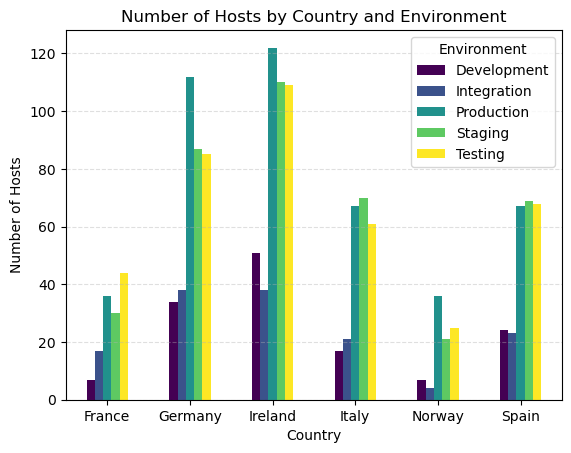

In [65]:
g = df_hosts.groupby(['Country', 'Environment']).size().unstack()
g.plot(kind='bar', colormap='viridis')
plt.title('Number of Hosts by Country and Environment')
plt.xlabel('Country')
plt.ylabel('Number of Hosts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4);


## 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas. (+4.5 puntos)

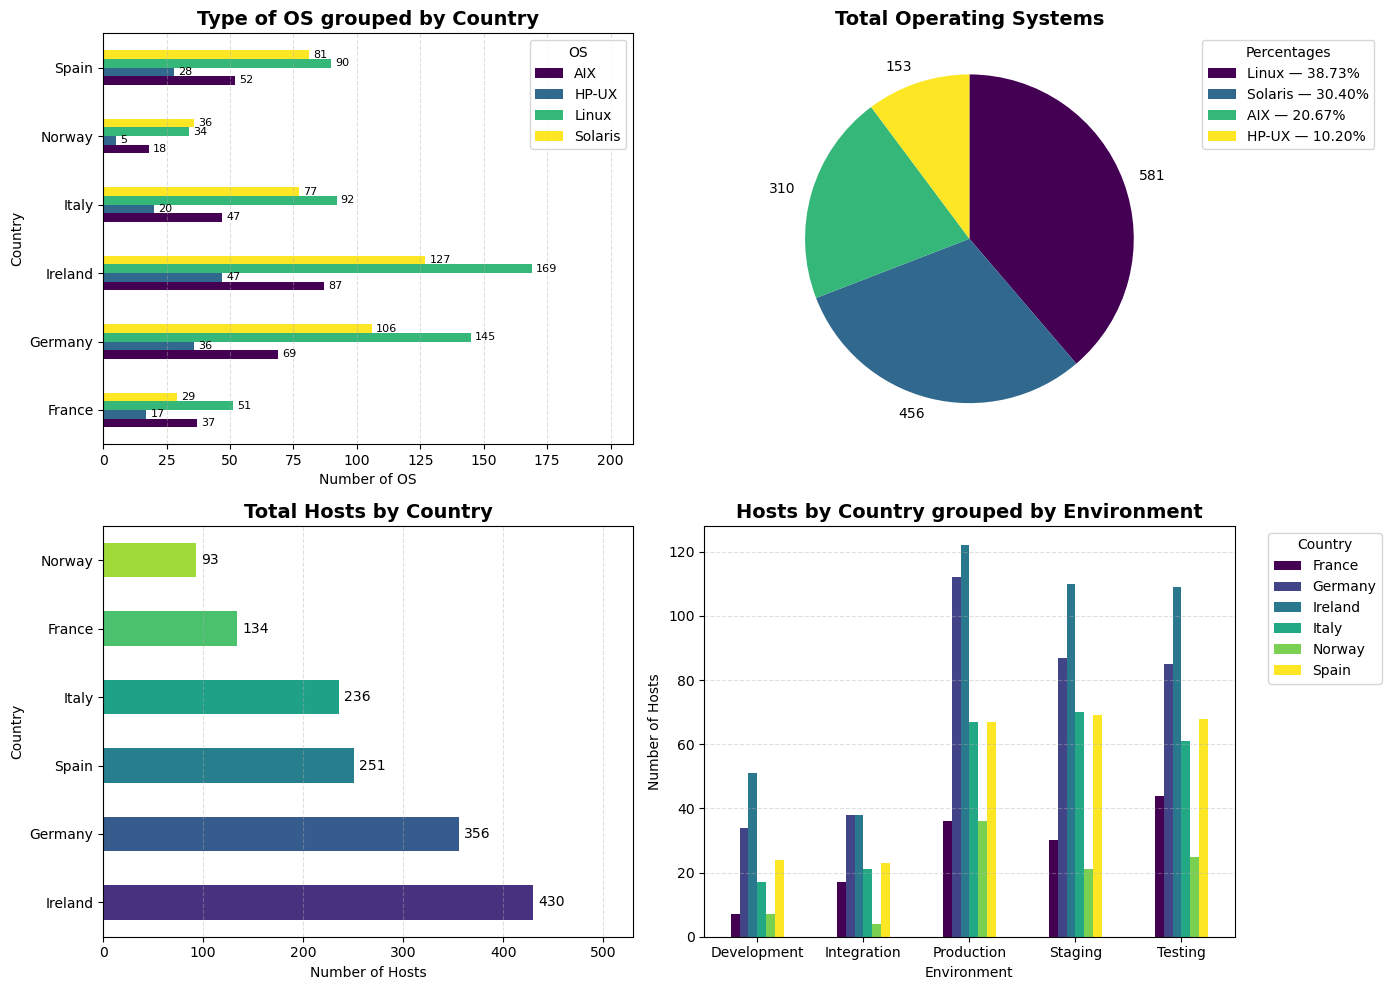

In [116]:
import seaborn as sns

# Generamos la figura general 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Distribución de Sistemas Operativos por País
g_os = df_hosts.groupby(['Country', 'OS']).size().unstack()

g_os.plot(kind='barh', ax=axs[0, 0], colormap='viridis')

axs[0, 0].set_title("Type of OS grouped by Country", fontweight='bold', fontsize=14)
axs[0, 0].set_xlabel("Number of OS")
axs[0, 0].set_ylabel("Country")
axs[0, 0].grid(axis='x', linestyle='--', alpha=0.4)
for container in axs[0, 0].containers:
    axs[0, 0].bar_label(container, fmt='%d', padding=3, fontsize=8)
axs[0, 0].set_xlim(0, g_os.values.max() + 40);


# Gráfico 2: Distribución Total de Sistemas Operativos
g_total_os = df_hosts['OS'].value_counts()
g_os_percent = (g_total_os / g_total_os.sum()) * 100

g_total_os.plot(kind='pie', ax=axs[0, 1], colormap='viridis', labels=g_total_os, startangle=90, counterclock=False);

axs[0, 1].set_title("Total Operating Systems", fontweight='bold', fontsize=14)
axs[0, 1].set_ylabel("")
handles, labels = axs[0, 1].get_legend_handles_labels()

labels = [
    f"{os_name} — {pct:.2f}%" 
    for os_name, pct in zip(g_total_os.index, g_os_percent)
]
axs[0, 1].legend(handles, labels, title='Percentages', bbox_to_anchor=(1.05, 1), loc='upper left');


# Gráfico 3: Distribución de Hosts Totales por País
g_total_hosts = df_hosts['Country'].value_counts()

colors = sns.color_palette("viridis", len(g_total_hosts))
g_total_hosts.plot(kind='barh', ax=axs[1, 0], color=colors)

axs[1, 0].set_title("Total Hosts by Country", fontweight='bold', fontsize=14)
axs[1, 0].set_xlabel("Number of Hosts")
axs[1, 0].set_ylabel("Country")
axs[1, 0].grid(axis='x', linestyle='--', alpha=0.4)
for i, v in enumerate(g_total_hosts.values):
    axs[1, 0].text(v + 5, i, str(v), va='center')
axs[1, 0].set_xlim(0, g_total_hosts.max() + 100);


# Gráfico 4: Distribución de Hosts por País y Entorno
g_hosts_country_env = df_hosts.groupby(['Country', 'Environment']).size().unstack(0)

g_hosts_country_env.plot(kind='bar', ax=axs[1, 1], colormap='viridis')

axs[1, 1].set_title("Hosts by Country grouped by Environment", fontweight='bold', fontsize=14)
axs[1, 1].set_xlabel("Environment")
axs[1,1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=0)
axs[1, 1].set_ylabel("Number of Hosts")
axs[1, 1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.4);

fig.tight_layout()
plt.show()